# Függvény közelítése globális bázisfüggvényekkel

1. lépés: szükséges csomagok importálása

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm
from scipy.integrate import quad


x = sm.Symbol("x")
sm.init_printing()
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

2. lépés: Adjuk meg az intervallumot, amin közelítjük a függvényt.

In [2]:
r0 = 0
r1 = 1
xc = np.linspace(r0, r1, 1001)

3. lépés: Adjunk meg egy függvényt, amit közelíteni szeretnénk.

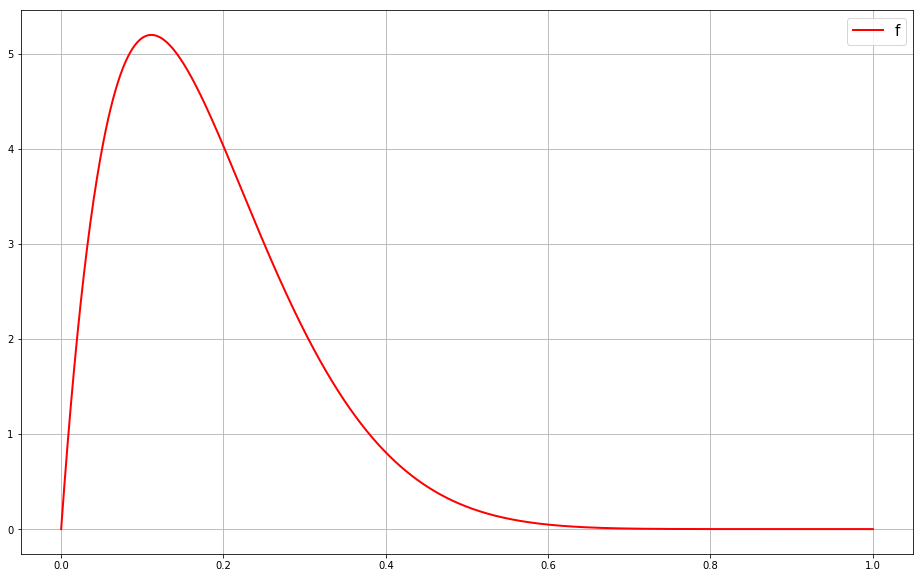

In [3]:
f = lambda x: 120 * x * (1 - x) ** 8
#f = lambda x: np.log(0.5+1e3*x)
#f = lambda x: np.abs(0.4 - x)

plt.figure(figsize=(16, 10))
plt.plot(xc, f(xc), "r-", linewidth=2, label="f")
plt.legend(fontsize=15)
plt.grid()

4. lépés: Állítsuk elő a V függvényteret, amiben f legjobb közelítését keressük.

[x, x**2, x**3]


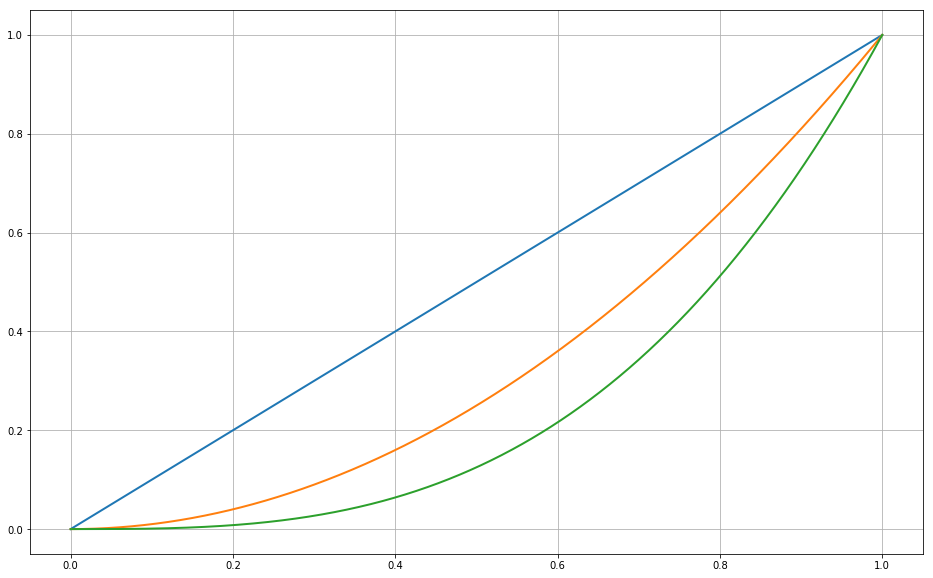

In [4]:
N = 3
V = [x**(i+1) for i in range(N)]
#V = [sm.sin(sm.pi/(r1 - r0) * (i + 1) * x) for i in range(N//2)]
#V = V + [sm.cos(sm.pi/(r1 - r0) * (i + 1) * x) for i in range(N//2)]
print(V)

plt.figure(figsize=(16, 10))
for v in V:
    vi = sm.lambdify([x], v, modules="numpy")
    plt.plot(xc, vi(xc), linewidth=2)
plt.grid()

5. lépés: Állítsuk össze az egyenletrendszert

In [5]:
A = np.zeros((N, N))
b = np.zeros(N)

for i in range(N):
    vi = sm.lambdify([x], V[i], modules="numpy")
    
    for j in range(N):
        vj = sm.lambdify([x], V[j], modules="numpy")
        A[i, j] = quad(lambda x: vi(x) * vj(x), r0, r1)[0]
        
    b[i] = quad(lambda x: vi(x) * f(x), r0, r1)[0]

6. lépés: Oldjuk meg az egyenletrendszert és határozzuk meg f legjobb közelítését a V térben

54.8251748251671*x**3 - 82.7972027971922*x**2 + 29.9300699300666*x


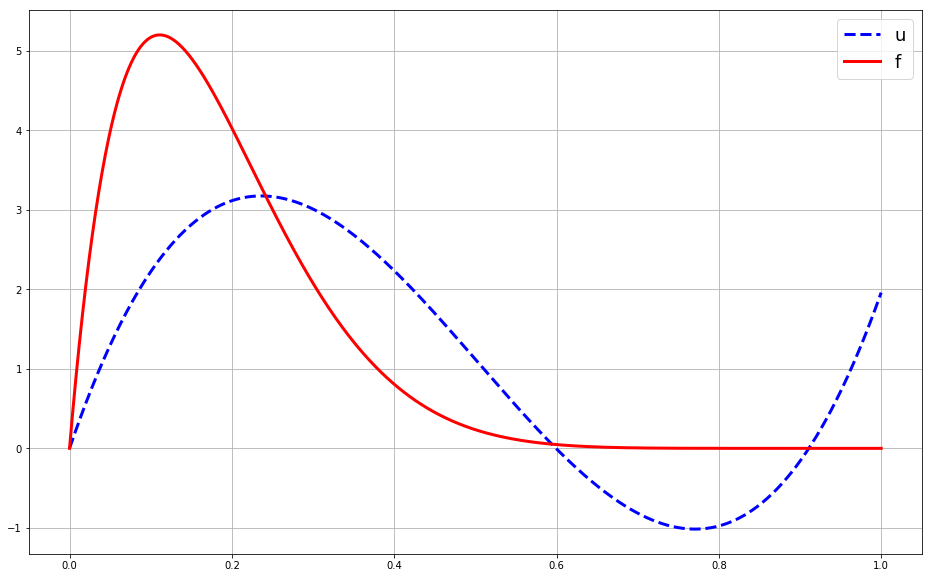

In [6]:
c = np.linalg.solve(A, b)
u = sum(c * V)
uf = sm.lambdify([x], u, modules="numpy")

print(u)

plt.figure(figsize=(16, 10))
plt.plot(xc, uf(xc), "b--", linewidth=3, label="u")
plt.plot(xc,  f(xc), "r-",  linewidth=3, label="f")

plt.legend(fontsize=18)
plt.grid();

Mérjük meg a hibát!

In [7]:
err = quad(lambda x: (f(x) - uf(x)) ** 2, r0, r1)[0] * 1 / (r1 - r0)

print("L2: ", err)

L2:  1.6934172512340475
